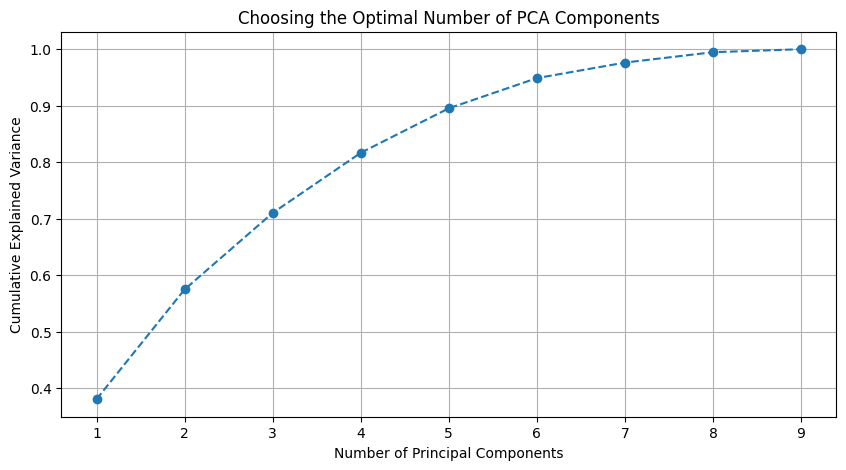

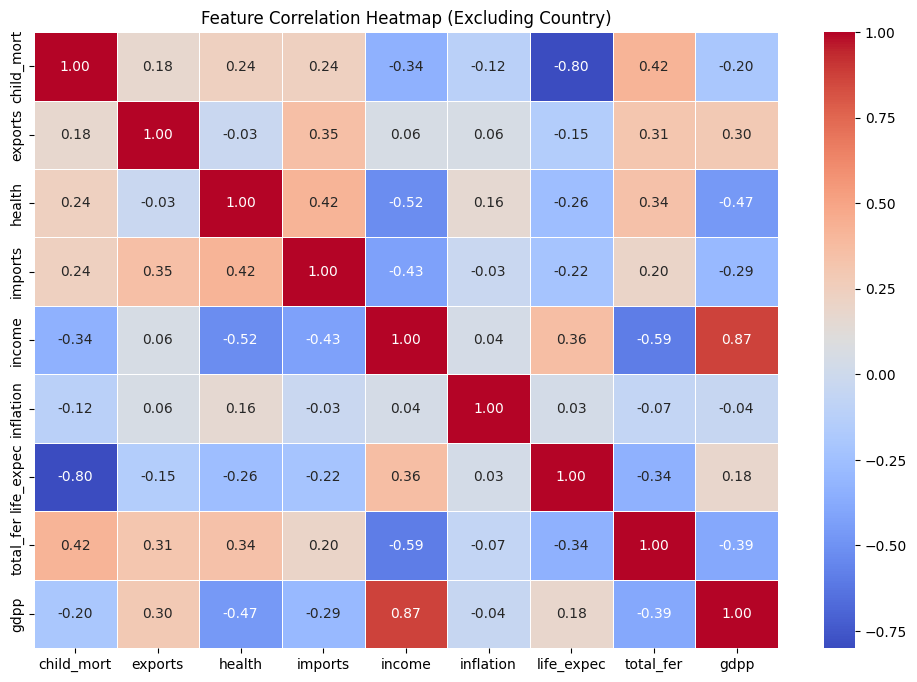

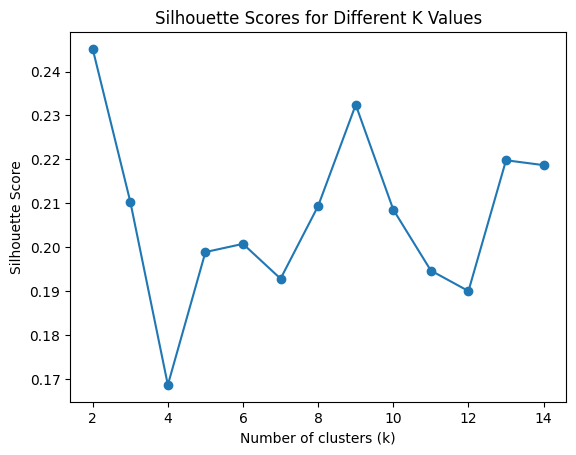

Silhouette Score (KMeans): 0.16863594709828106


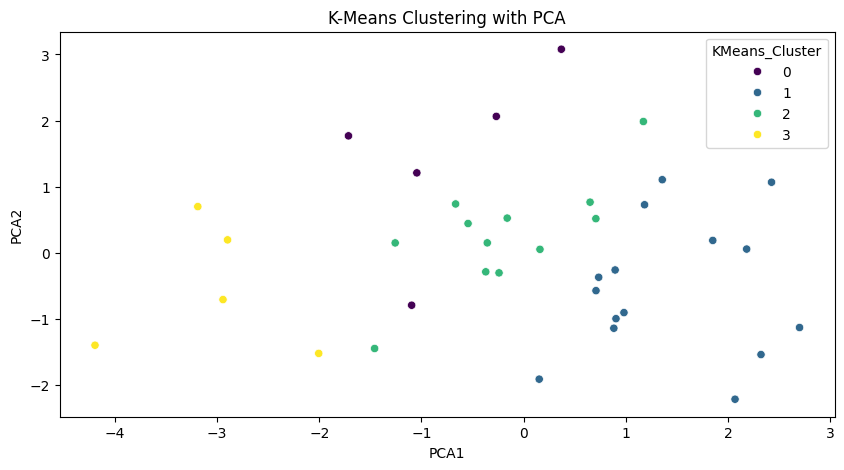

Cluster
0    [Benin, Cameroon, Cote d'Ivoire, Ghana, Kenya,...
1    [Chad, Congo, Dem. Rep., Guinea, Haiti, Mali, ...
2    [Bangladesh, Eritrea, India, Myanmar, Nepal, P...
3    [Afghanistan, Burkina Faso, Burundi, Central A...
Name: country, dtype: object
['Chad', 'Congo, Dem. Rep.', 'Guinea', 'Haiti', 'Mali', 'Mozambique', 'Niger', 'Togo']
8
['Benin', 'Cameroon', "Cote d'Ivoire", 'Ghana', 'Kenya', 'Lao', 'Madagascar', 'Senegal', 'Zambia']
9


In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

df = pd.read_csv("cluster_7_data.csv")

df_numeric = df.select_dtypes(include=[float, int])

scaler =  RobustScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

pca = PCA()
pca.fit(df_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Optimal Number of PCA Components")
plt.grid()
plt.show()

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Excluding Country)")
plt.show()

pca = PCA(n_components=4)  # Reduce to 2D for visualization
pca_features = pca.fit_transform(df_scaled)
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

k_range = range(2, 15)  # Test k values from 2 to 10
scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pca_features)
    score = silhouette_score(pca_features, clusters)
    scores.append(score)

# Plot silhouette scores for different k
plt.plot(k_range, scores, marker='o')
plt.title("Silhouette Scores for Different K Values")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(pca_features)
print("Silhouette Score (KMeans):", silhouette_score(pca_features, df['KMeans_Cluster']))


# Plot PCA Results with K-Means
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering with PCA")
plt.show()

df['Cluster'] = kmeans.fit_predict(df[['PCA1', 'PCA2']])

country_clusters = df.groupby('Cluster')['country'].apply(list)
print(country_clusters)


print(country_clusters.get(1))
print(len(country_clusters.get(1)))
print(country_clusters.get(0))
print(len(country_clusters.get(0)))

In [194]:
agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(pca_features)
score = silhouette_score(pca_features, df['Agglo_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {score:.4f}")

Agglomerative Clustering Silhouette Score: 0.2582


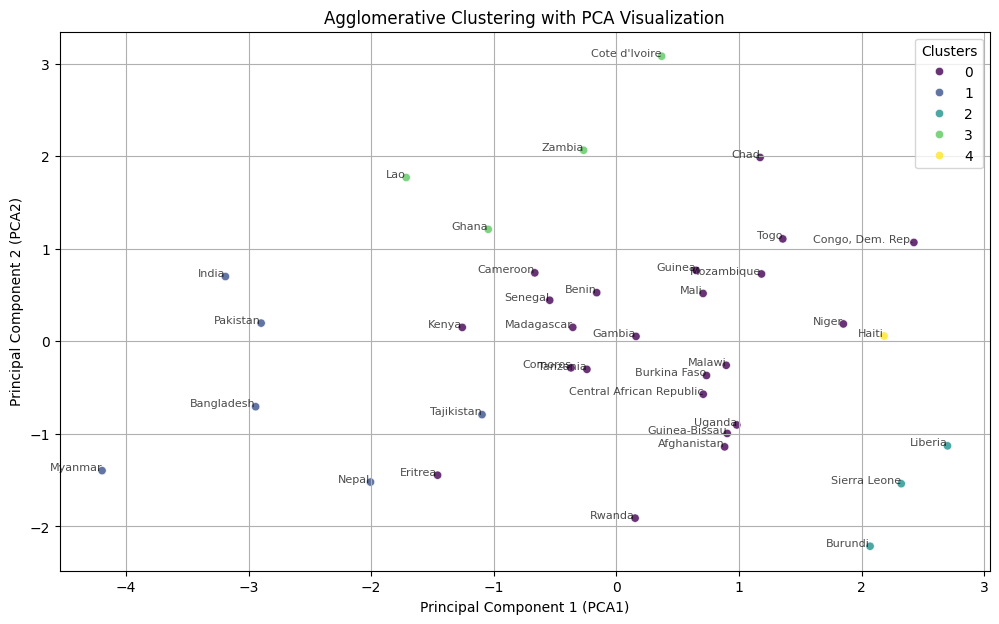

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with Agglomerative Clusters
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=df['PCA1'], 
    y=df['PCA2'], 
    hue=df['Agglo_Cluster'], 
    palette='viridis', 
    alpha=0.8
)

# Add country labels for each point
for i in range(len(df)):
    plt.text(df['PCA1'].iloc[i], df['PCA2'].iloc[i], df['country'].iloc[i], 
             fontsize=8, alpha=0.7, ha='right')

# Labels & title
plt.xlabel("Principal Component 1 (PCA1)")
plt.ylabel("Principal Component 2 (PCA2)")
plt.title("Agglomerative Clustering with PCA Visualization")
plt.legend(title="Clusters")
plt.grid()

plt.show()



In [196]:
# Group countries by Agglomerative Clustering results
country_clusters_agglo = df.groupby('Agglo_Cluster')['country'].apply(list)

# Print all clusters
for cluster, countries in country_clusters_agglo.items():
    print(f"Cluster {cluster}:")
    print(countries)
    print("\n" + "-"*50 + "\n")  # Separator for readability


Cluster 0:
['Afghanistan', 'Benin', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Eritrea', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda', 'Senegal', 'Tanzania', 'Togo', 'Uganda']

--------------------------------------------------

Cluster 1:
['Bangladesh', 'India', 'Myanmar', 'Nepal', 'Pakistan', 'Tajikistan']

--------------------------------------------------

Cluster 2:
['Burundi', 'Liberia', 'Sierra Leone']

--------------------------------------------------

Cluster 3:
["Cote d'Ivoire", 'Ghana', 'Lao', 'Zambia']

--------------------------------------------------

Cluster 4:
['Haiti']

--------------------------------------------------

